In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from numpy import mean, std
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

## EDA & Preprocessing

In [2]:
df = pd.read_csv('Melbourne_housing_FULL-fix.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34857 non-null  float64
 9   Postcode       34857 non-null  int64  
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34857 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year

In [5]:
df['Date']

0       2016-09-03
1       2016-12-03
2       2016-02-04
3       2016-02-04
4       2017-03-04
           ...    
34852   2018-02-24
34853   2018-02-24
34854   2018-02-24
34855   2018-02-24
34856   2018-02-24
Name: Date, Length: 34857, dtype: datetime64[ns]

Thời gian dữ liệu kéo dài từ 3/9/2016 đến 24/2/2018

#### Outliers

In [6]:
ordinal = OrdinalEncoder()
df1 = ordinal.fit_transform(df[['Suburb', 'Method', 'Type']])
df[['Suburb', 'Method', 'Type']] = ordinal.transform(df[['Suburb', 'Method', 'Type']])

In [7]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          0
Lattitude         7976
Longtitude        7976
Regionname           0
Propertycount        0
Year                 0
dtype: int64

In [8]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Year'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  float64       
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  float64       
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  float64       
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34857 non-null  float64       
 9   Postcode       34857 non-null  int64         
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [10]:
#Drop the columns with contain >8000 misssing values and string column
df.drop(['Bedroom2', 'Bathroom', 'Car','Landsize', 'BuildingArea', 'YearBuilt', 'Address', 'SellerG', 'Regionname', 'CouncilArea',   'Date'], axis=1, inplace=True )

<Axes: >

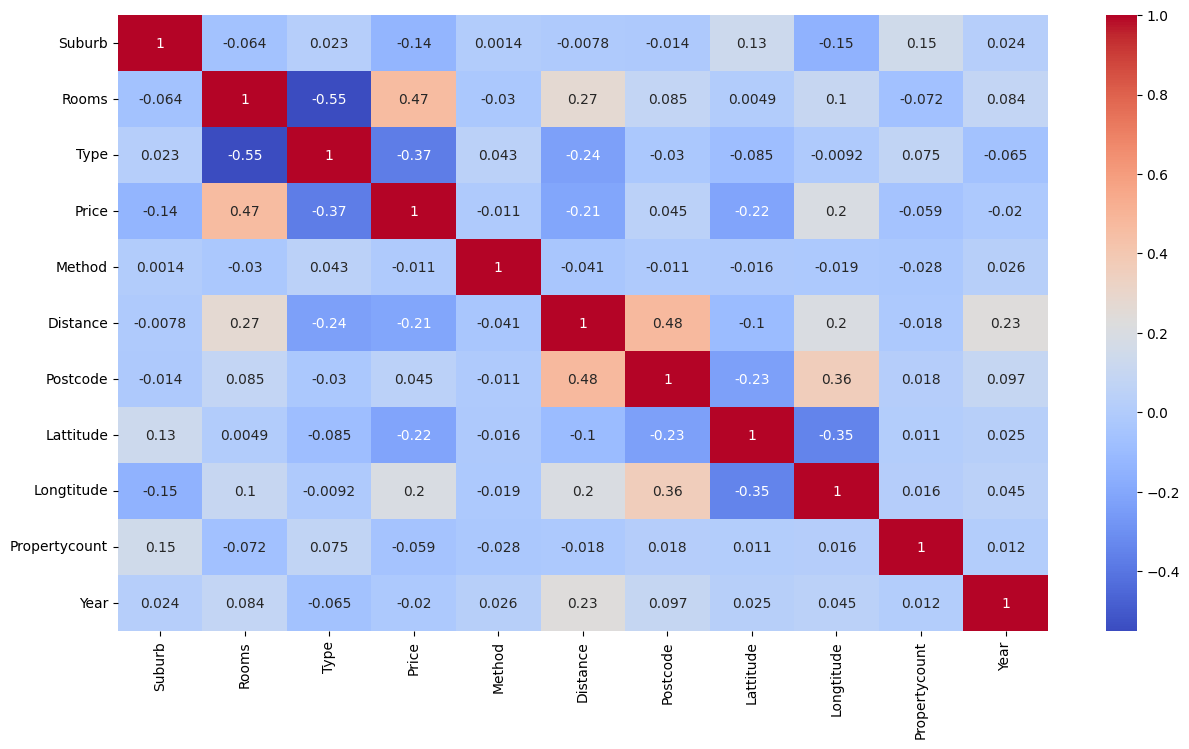

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
# corr > 0.2
selected = ['Rooms', 'Type', 'Distance', 'Longtitude', 'Lattitude', 'Price']
df = df[df['Price'] < 1500000]
df = df[selected]


In [7]:
df.dropna(inplace = True)

In [8]:
# df['y'] = np.log(df['Price'])  
df['y'] = df['Price']
df1 = df.copy()  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17011 entries, 1 to 34856
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       17011 non-null  int64  
 1   Type        17011 non-null  float64
 2   Distance    17011 non-null  float64
 3   Longtitude  17011 non-null  float64
 4   Lattitude   17011 non-null  float64
 5   Price       17011 non-null  float64
 6   y           17011 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.0 MB


In [10]:
df.drop(['Price'], axis = 1, inplace = True)

df.sort_index(inplace=True)

split_index = int(len(df) * 0.8)  

train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# scaler = RobustScaler()
# train_scaled = scaler.fit_transform(train)
# train_data = pd.DataFrame(train_scaled, columns=train.columns)
X_train = train_data.drop(['y'], axis=1).values
y_train = train_data['y'].values
X_test = test_data.drop(['y'], axis=1).values
y_test = test_data['y'].values

## Linear Regression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.score(X_train,y_train)

0.5507439454758071

In [14]:
lr.intercept_

-126287266.04719879

In [15]:
lr.coef_

array([ 129406.67041815, -165202.69078222,  -23451.13608398,
        646809.68102006, -882009.69721502])

In [16]:
y_pred = lr.predict(X_test)

In [17]:
#Rính MAE
test_mae1 = np.mean(np.abs(y_pred - y_test))
print("MAE:", test_mae1)

# Tính RMSE
test_rmse1 = np.sqrt(np.mean((y_pred - y_test)**2))
print('\nRMSE:', test_rmse1)

# Tính MAPE
test_mape1 = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('\nMAPE:', test_mape1)

MAE: 158113.15959021915

RMSE: 209096.28830129904

MAPE: 0.1972980328169053


In [18]:
y_pred

array([1185440.45090823,  924153.41282208,  901619.63343565, ...,
        892580.89559196,  727586.92217837,  898261.0515331 ])

In [19]:
y_test

array([ 915000., 1180000.,  914888., ...,  888000.,  705000., 1020000.])

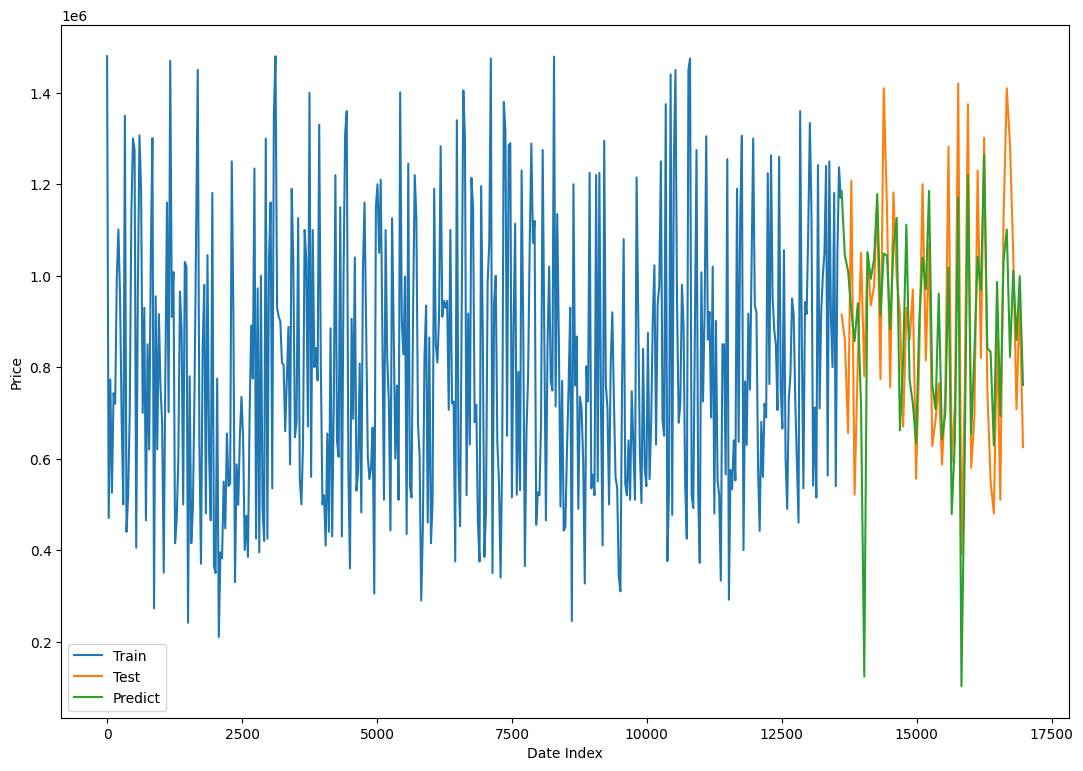

In [20]:
plt.figure(figsize=(13, 9))

visual_train = df1.iloc[:split_index]['Price']
index_train = np.arange(0, len(y_train), 30)
plt.plot(index_train, visual_train[::30], label='Train') 

index_test = np.arange(len(y_train), len(y_test)+len(y_train), 60)
plt.plot(index_test, y_test[::60], label='Test') 


index_pred = np.arange(len(y_train), len(y_test)+len(y_train), 60)
plt.plot(index_test, y_pred[::60], label='Predict') 

plt.xlabel('Date Index')
plt.ylabel('Price')
plt.legend()
plt.show()


## RandomForest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train )

y_pred = rf.predict(X_test)

[Text(0.6694989019660033, 0.9875, 'x[1] <= 1.5\nsquared_error = 91911769141.123\nsamples = 8571\nvalue = 836859.449'),
 Text(0.47663194534961767, 0.9625, 'x[4] <= -37.73\nsquared_error = 80376398640.659\nsamples = 6385\nvalue = 919179.861'),
 Text(0.2341967218886565, 0.9375, 'x[3] <= 144.873\nsquared_error = 75541151481.497\nsamples = 4947\nvalue = 981539.53'),
 Text(0.0383459559539782, 0.9125, 'x[2] <= 13.05\nsquared_error = 34045319380.373\nsamples = 772\nvalue = 694364.555'),
 Text(0.007814416585557931, 0.8875, 'x[4] <= -37.846\nsquared_error = 35575531371.999\nsamples = 410\nvalue = 771442.973'),
 Text(0.001242527265068715, 0.8625, 'x[1] <= 0.5\nsquared_error = 44847393333.333\nsamples = 17\nvalue = 1064200.0'),
 Text(0.0009122352072656389, 0.8375, 'x[2] <= 11.85\nsquared_error = 36441289930.556\nsamples = 14\nvalue = 1125458.333'),
 Text(0.0007864096614358956, 0.8125, 'x[4] <= -37.868\nsquared_error = 27959943310.657\nsamples = 13\nvalue = 1084095.238'),
 Text(0.000251651091659486

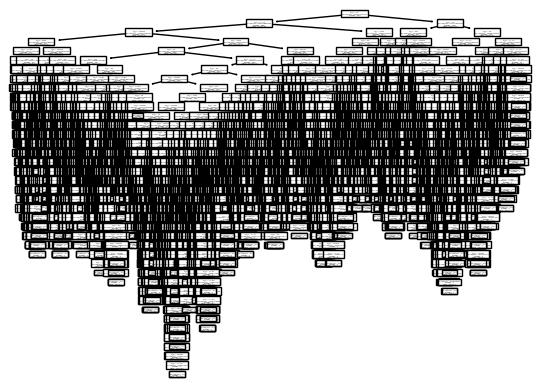

In [22]:
from sklearn import tree
tree.plot_tree(rf.estimators_[0])

In [23]:
#Rính MAE
test_mae2 = np.mean(np.abs(y_pred - y_test))
print("MAE:", test_mae2)

# Tính RMSE
test_rmse2 = np.sqrt(np.mean((y_pred - y_test)**2))
print('\nRMSE:', test_rmse2)

# Tính MAPE
test_mape2 = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('\nMAPE:', test_mape2)

MAE: 106647.37133397703

RMSE: 145500.9532429174

MAPE: 0.12163328122550755


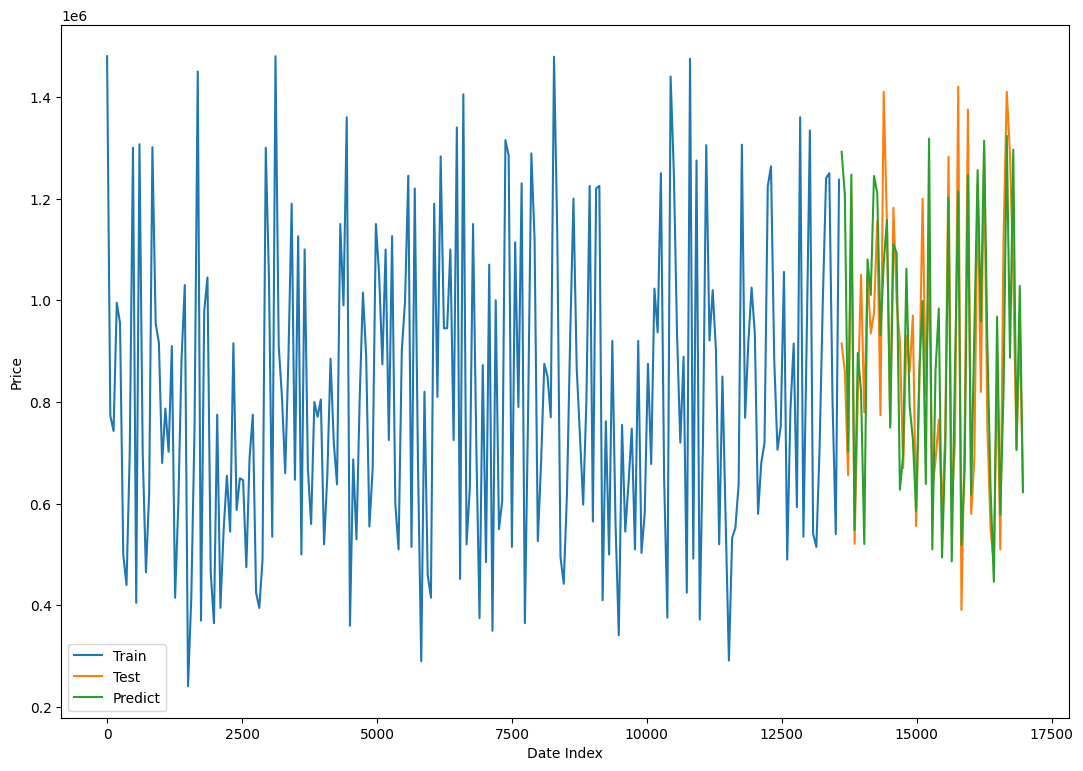

In [23]:
plt.figure(figsize=(13, 9))

visual_train = df1.iloc[:split_index]['Price']
index_train = np.arange(0, len(y_train), 60)
plt.plot(index_train, visual_train[::60], label='Train') 

index_test = np.arange(len(y_train), len(y_test)+len(y_train), 60)
plt.plot(index_test, y_test[::60], label='Test') 


index_pred = np.arange(len(y_train), len(y_test)+len(y_train), 60)
plt.plot(index_test, y_pred[::60], label='Predict') 

plt.xlabel('Date Index')
plt.ylabel('Price')
plt.legend()
plt.show()


## XGBoost

In [24]:
xgb = xgb.XGBRegressor()

In [25]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [26]:
#Rính MAE
test_mae3 = np.mean(np.abs(y_pred - y_test))
print("MAE:", test_mae3)

# Tính RMSE
test_rmse3 = np.sqrt(np.mean((y_pred - y_test)**2))
print('\nRMSE:', test_rmse3)

# Tính MAPE
test_mape3 = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('\nMAPE:', test_mape3)

MAE: 104136.84593557156

RMSE: 139957.8564024226

MAPE: 0.11911230565074647


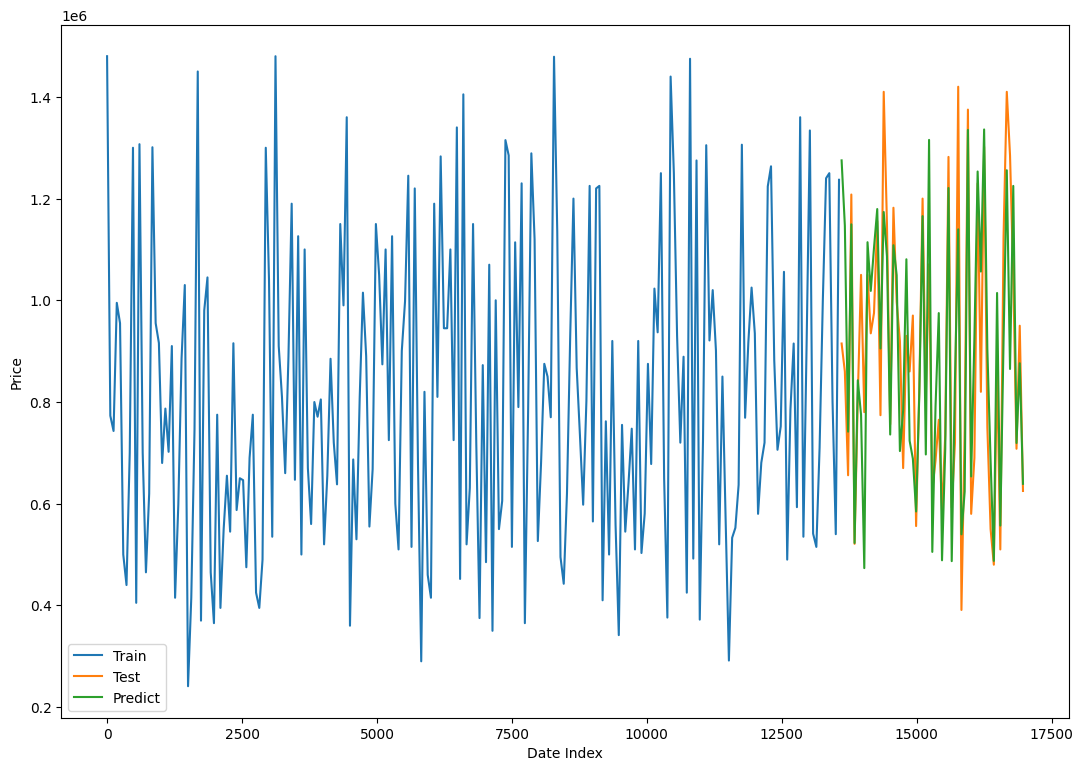

In [27]:
plt.figure(figsize=(13, 9))

visual_train = df1.iloc[:split_index]['Price']
index_train = np.arange(0, len(y_train), 60)
plt.plot(index_train, visual_train[::60], label='Train') 

index_test = np.arange(len(y_train), len(y_test)+len(y_train), 60)
plt.plot(index_test, y_test[::60], label='Test') 


index_pred = np.arange(len(y_train), len(y_test)+len(y_train), 60)
plt.plot(index_test, y_pred[::60], label='Predict') 

plt.xlabel('Date Index')
plt.ylabel('Price')
plt.legend()
plt.show()


## SVR

In [28]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')

In [29]:
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [30]:
#Rính MAE
test_mae4 = np.mean(np.abs(y_pred - y_test))
print("MAE:", test_mae4)

# Tính RMSE
test_rmse4 = np.sqrt(np.mean((y_pred - y_test)**2))
print('\nRMSE:', test_rmse4)

# Tính MAPE
test_mape4 = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('\nMAPE:', test_mape4)

MAE: 232178.57142027034

RMSE: 287305.72897809313

MAPE: 0.2735683541656199


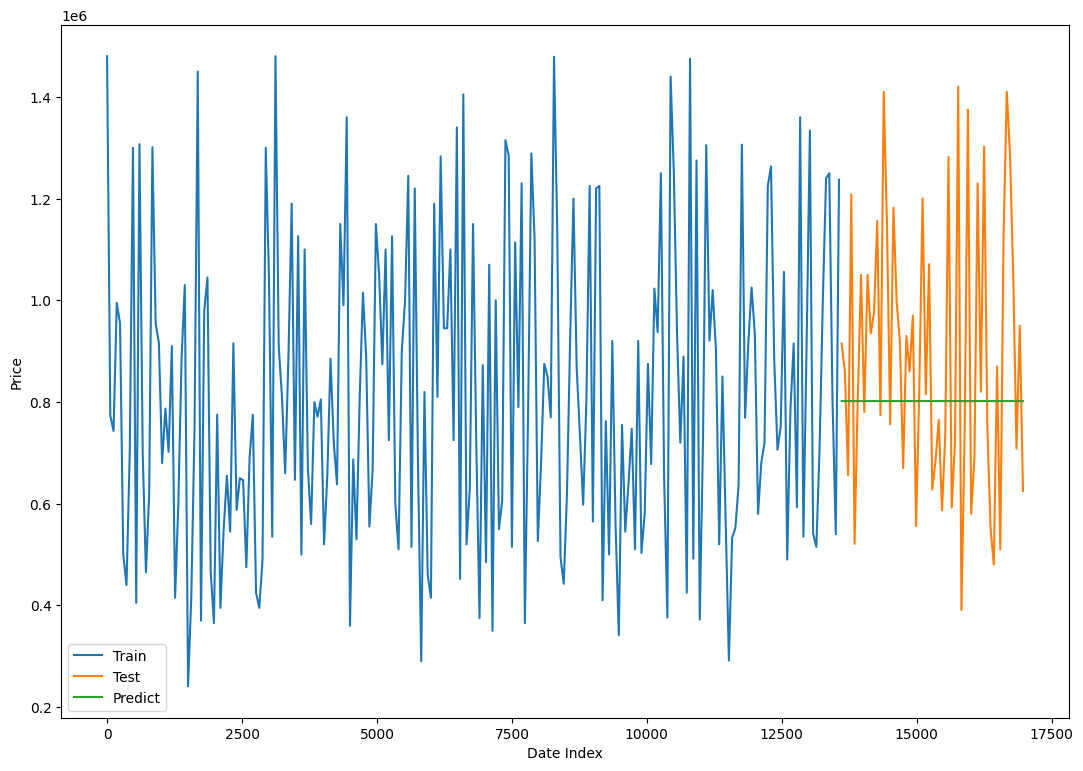

In [31]:
plt.figure(figsize=(13, 9))

visual_train = df1.iloc[:split_index]['Price']
index_train = np.arange(0, len(y_train), 60)
plt.plot(index_train, visual_train[::60], label='Train') 

index_test = np.arange(len(y_train), len(y_test)+len(y_train), 60)
plt.plot(index_test, y_test[::60], label='Test') 


index_pred = np.arange(len(y_train), len(y_test)+len(y_train), 60)
plt.plot(index_test, y_pred[::60], label='Predict') 

plt.xlabel('Date Index')
plt.ylabel('Price')
plt.legend()
plt.show()

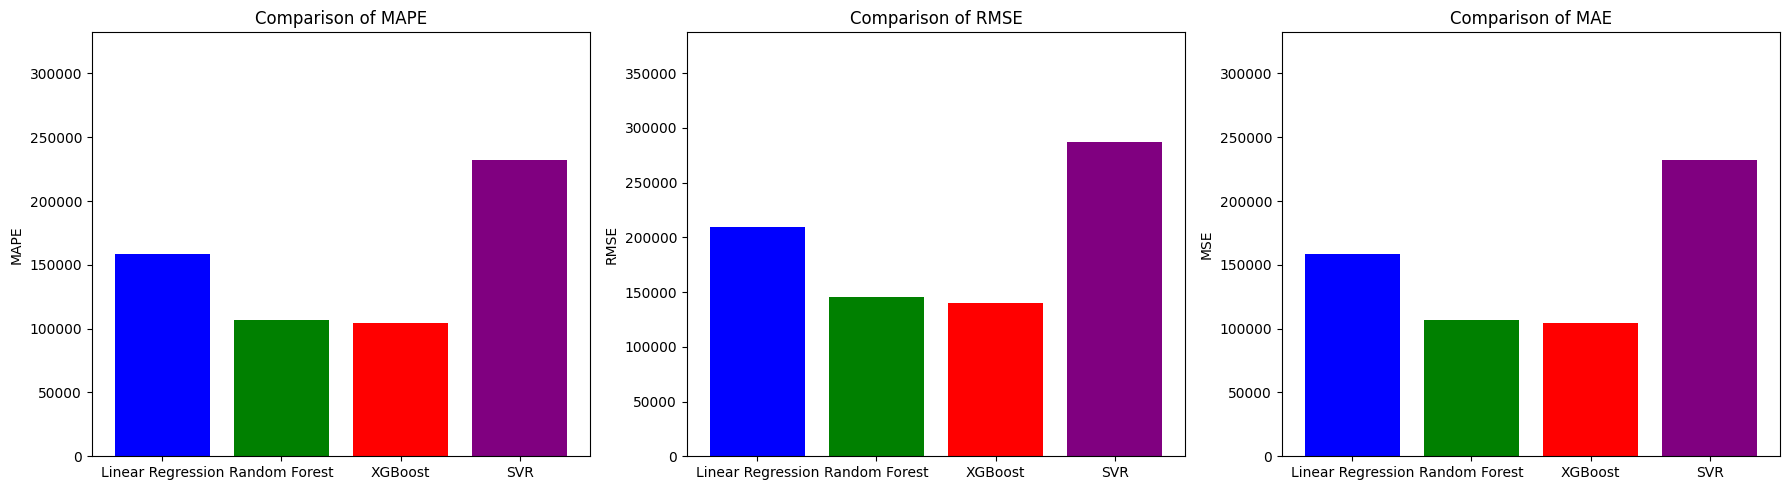

In [41]:
import matplotlib.pyplot as plt

# Error metrics for each model
models = ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR']
mape = [test_mae1, test_mae2, test_mae3, test_mae4]
rmse = [test_rmse1, test_rmse2, test_rmse3, test_rmse4]
mae = [test_mae1, test_mae2, test_mae3, test_mae4]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot for MAPE
axs[0].bar(models, mape, color=['blue', 'green', 'red', 'purple'])
axs[0].set_title('Comparison of MAPE')
axs[0].set_ylabel('MAPE')
axs[0].set_ylim(0, max(mape) + 100000)

# Plot for RMSE
axs[1].bar(models, rmse, color=['blue', 'green', 'red', 'purple'])
axs[1].set_title('Comparison of RMSE')
axs[1].set_ylabel('RMSE')
axs[1].set_ylim(0, max(rmse) + 100000)

# Plot for MSE
axs[2].bar(models, mae, color=['blue', 'green', 'red', 'purple'])
axs[2].set_title('Comparison of MAE')
axs[2].set_ylabel('MSE')
axs[2].set_ylim(0, max(mae) + 100000)

# Display the plots
plt.tight_layout()
plt.show()
